In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('metro_zvi.csv')
df = df.drop(columns=['RegionID', 'RegionType','SizeRank','StateName'])
df = df.set_index('RegionName')
df = df.loc[:, '2000-01-31':]

df_plot = df.head(10)
df_plot = df_plot.T
df_plot.index = pd.to_datetime(df_plot.index) 

df.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,127424.200349,128188.399888,129013.278919,129871.299556,130732.588158,...,368342.550149,368944.348980,369448.501052,370184.720224,370828.567353,371298.260498,371016.982722,370477.532421,369777.238792,369146.758903
"New York, NY",224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,232218.002977,234660.852635,237262.621009,239925.243478,242580.970030,...,694463.939098,698112.907260,700981.582357,702828.956760,703938.611027,705266.111170,707009.440660,709510.127516,711326.861714,712842.475773
"Los Angeles, CA",228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,237587.321809,240095.472951,242627.519269,245012.685766,247142.518708,...,979263.294758,984668.937931,989326.464086,993489.580771,994044.173013,991951.863479,986697.459794,982246.652053,977325.621835,972836.618922
"Chicago, IL",159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,162113.178079,163116.480169,164532.175467,166194.535616,168109.513101,...,336401.662700,337417.542386,338496.548214,339792.563198,341188.253115,342585.506509,343463.210750,344086.738417,344388.252982,344762.755307
"Dallas, TX",130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,131536.569175,131779.894376,132144.393518,132601.186679,133120.876084,...,386210.886078,386101.104828,385802.176509,385258.927239,384716.914401,383910.093012,382370.526648,380191.067291,377715.452411,375293.228730


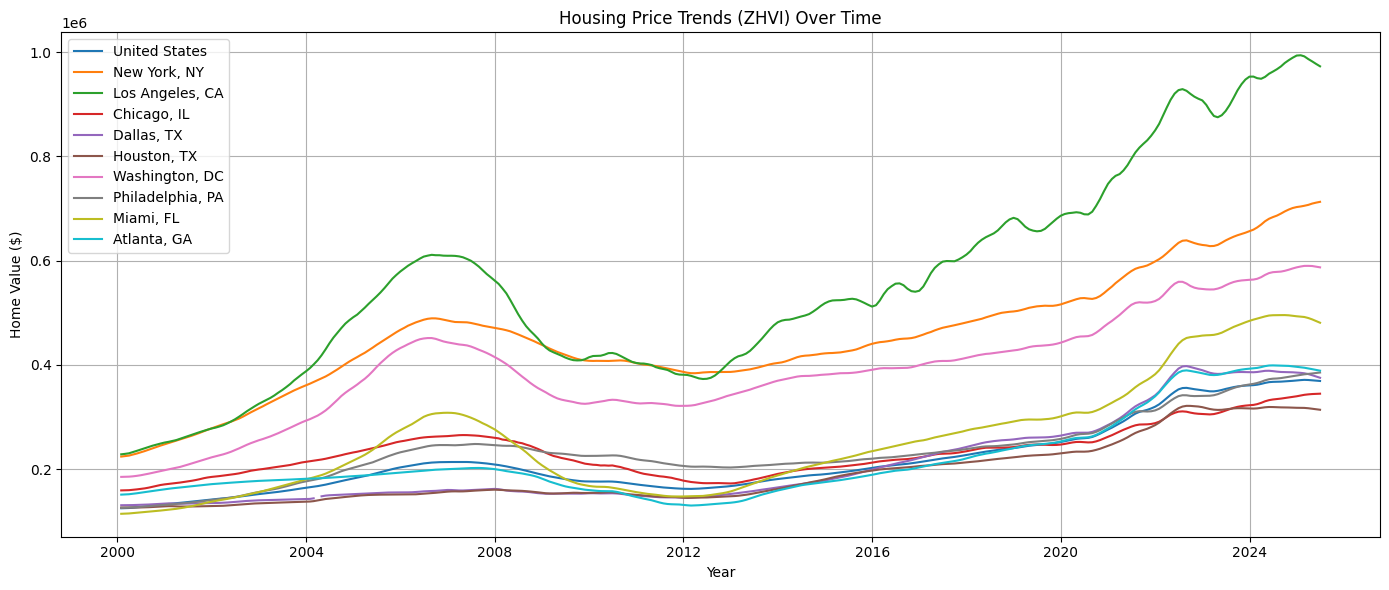

In [17]:


plt.figure(figsize=(14, 6))
for city in df_plot.columns:
    plt.plot(df_plot.index, df_plot[city], label=city)

plt.title("Housing Price Trends (ZHVI) Over Time")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': '12-Month Rolling Average of Home Prices'}>

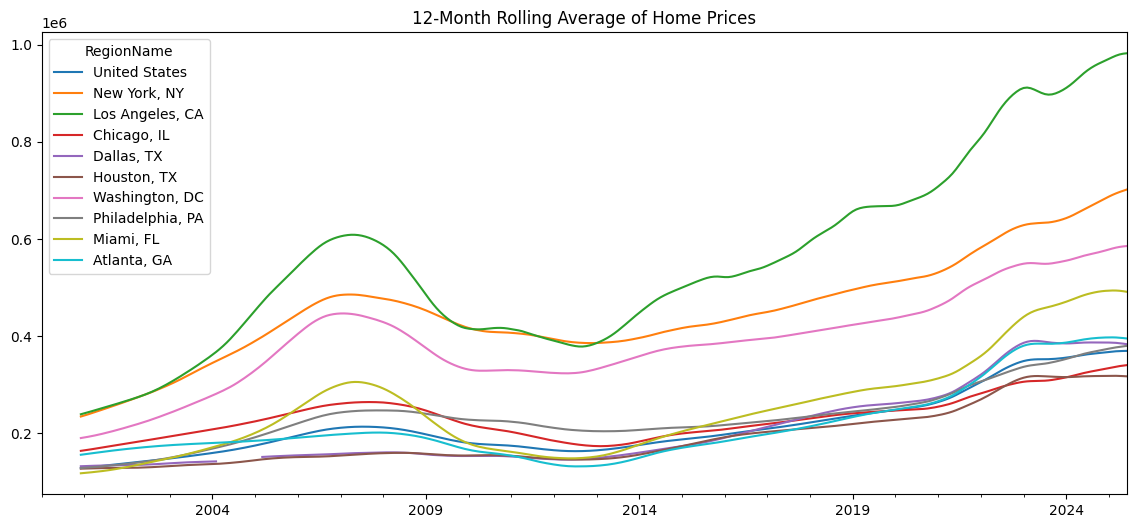

In [38]:
df_roll = df_plot.rolling(window=12).mean()
df_roll.plot(figsize=(14,6), title="12-Month Rolling Average of Home Prices")


In [36]:
# Calculate rolling means for all numeric columns
df_rolling = df.T.rolling(window=12).mean().T
# Rename rolling columns
df_rolling.columns = [col + '_rolling' for col in df.columns]

# Concatenate original + rolling columns
df_combined = pd.concat([df, df_rolling], axis=1)

df_combined.head(12)

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30_rolling,2024-10-31_rolling,2024-11-30_rolling,2024-12-31_rolling,2025-01-31_rolling,2025-02-28_rolling,2025-03-31_rolling,2025-04-30_rolling,2025-05-31_rolling,2025-06-30_rolling
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,127424.200349,128188.399888,129013.278919,129871.299556,130732.588158,...,364244.850817,365023.543555,365788.438882,366577.648468,367383.655056,368161.259535,368784.066906,369203.756896,369442.917619,369581.683461
"New York, NY",224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,232218.002977,234660.852635,237262.621009,239925.243478,242580.970030,...,672024.470010,675933.864219,679882.523331,683746.343056,687453.382093,690922.123929,694069.869748,696898.909494,699477.348069,701916.262658
"Los Angeles, CA",228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,237587.321809,240095.472951,242627.519269,245012.685766,247142.518708,...,957012.621436,960854.380400,964346.117738,967721.259642,971129.388254,974617.538703,977764.034127,980240.710209,981799.145447,982642.521371
"Chicago, IL",159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,162113.178079,163116.480169,164532.175467,166194.535616,168109.513101,...,328565.151053,329938.793697,331323.030142,332760.230141,334256.490202,335749.059995,337105.953150,338266.240346,339268.113796,340195.293052
"Dallas, TX",130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,131536.569175,131779.894376,132144.393518,132601.186679,133120.876084,...,386957.631648,386936.098297,386901.675105,386850.224735,386751.731174,386544.315912,386108.515926,385407.359574,384487.471229,383423.156212
"Houston, TX",126285.073447,126308.596479,126220.423407,126273.128049,126321.746391,126517.293310,126708.096019,127005.363871,127392.076714,127715.428344,...,317751.811322,317859.812130,317963.731419,318088.128901,318207.901287,318282.419399,318217.262816,317985.727684,317627.686303,317195.861344
"Washington, DC",185149.753657,185300.294755,185577.751960,186205.994826,187161.030780,188310.546222,189740.785810,191334.635435,192971.846377,194612.045892,...,570818.011651,572535.928419,574396.008628,576385.634088,578474.629392,580536.606027,582343.184045,583766.835771,584793.577777,585565.541118
"Philadelphia, PA",125748.394230,126027.885836,126218.627731,126689.302974,127144.778627,127694.109847,128265.028630,128880.840872,129554.371828,130252.811334,...,368416.703826,369876.922920,371315.106581,372756.007992,374188.906481,375581.465598,376833.062181,377922.561202,378914.976467,379905.467399
"Miami, FL",114340.669342,114654.558431,114986.950845,115658.455905,116308.279318,116950.376943,117614.497504,118295.707925,119027.359955,119762.802118,...,490101.746669,491462.940626,492497.942168,493235.259194,493719.360016,493977.390739,493889.594162,493415.148904,492528.711510,491326.887883


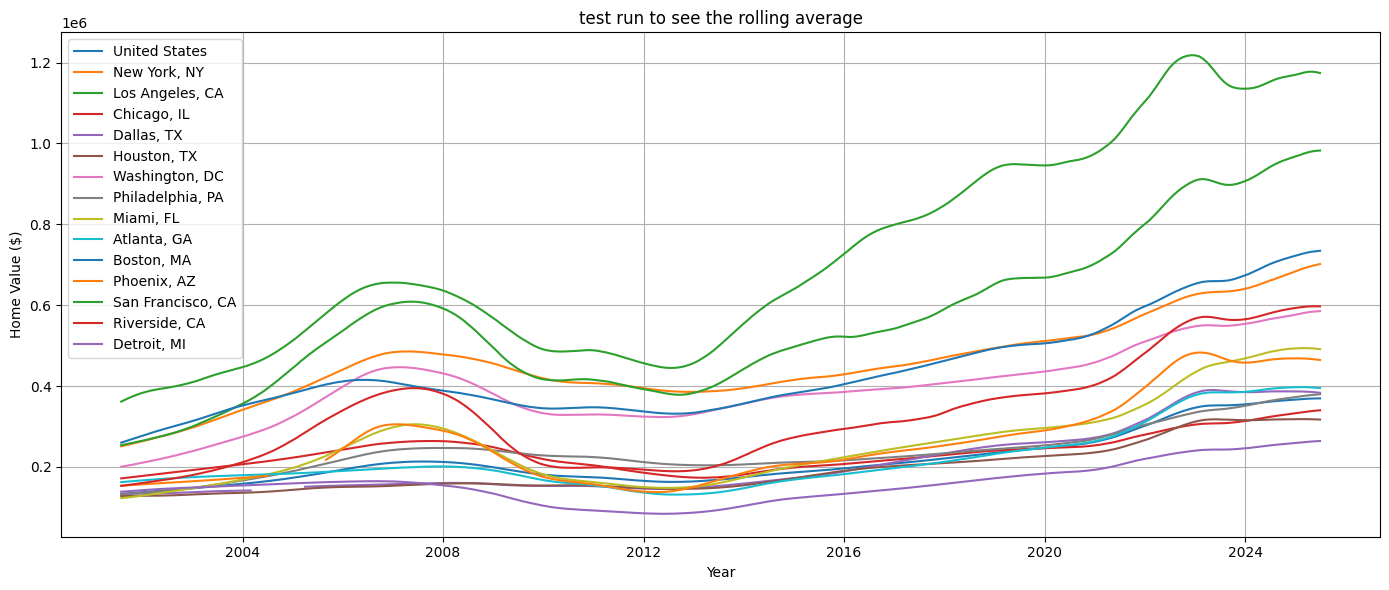

In [55]:
test_run_df = df_combined[df_combined.columns[-12*24:]].head(15)
test_run_df = test_run_df.T
test_run_df.index = pd.to_datetime(test_run_df.index.str[:10])

plt.figure(figsize=(14, 6))
for city in test_run_df.columns:
    plt.plot(test_run_df.index, test_run_df[city], label=city)

plt.title("test run to see the rolling average")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_28319/1300381239.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct = df.T.pct_change(periods=12) * 100  # % change year-over-year


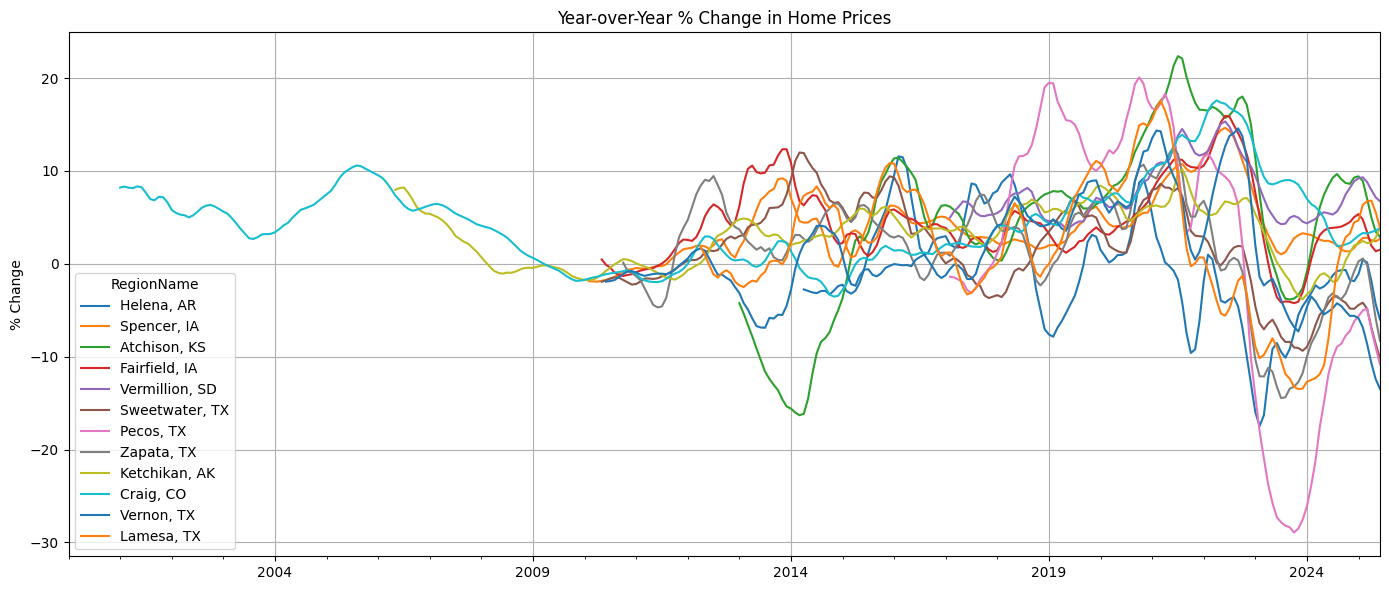

In [56]:
df_pct = df.T.pct_change(periods=12) * 100  # % change year-over-year
df_pct = df_pct.T
df_pct = df_pct.tail(12)  # last year
df_pct = df_pct.T
df_pct.index = pd.to_datetime(df_pct.index.str[:10])

df_pct.plot(figsize=(14, 6), title="Year-over-Year % Change in Home Prices")
plt.ylabel("% Change")
plt.grid(True)
plt.tight_layout()
plt.show()


,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,127424.200349,128188.399888,129013.278919,129871.299556,130732.588158,...,368342.550149,368944.348980,369448.501052,370184.720224,370828.567353,371298.260498,371016.982722,370477.532421,369777.238792,369146.758903
"New York, NY",224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,232218.002977,234660.852635,237262.621009,239925.243478,242580.970030,...,694463.939098,698112.907260,700981.582357,702828.956760,703938.611027,705266.111170,707009.440660,709510.127516,711326.861714,712842.475773
"Los Angeles, CA",228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,237587.321809,240095.472951,242627.519269,245012.685766,247142.518708,...,979263.294758,984668.937931,989326.464086,993489.580771,994044.173013,991951.863479,986697.459794,982246.652053,977325.621835,972836.618922
"Chicago, IL",159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,162113.178079,163116.480169,164532.175467,166194.535616,168109.513101,...,336401.662700,337417.542386,338496.548214,339792.563198,341188.253115,342585.506509,343463.210750,344086.738417,344388.252982,344762.755307
"Dallas, TX",130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,131536.569175,131779.894376,132144.393518,132601.186679,133120.876084,...,386210.886078,386101.104828,385802.176509,385258.927239,384716.914401,383910.093012,382370.526648,380191.067291,377715.452411,375293.228730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zapata, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142519.346796,141543.788987,140694.812207,140081.758149,139591.033021,139060.037085,138296.346480,136113.475153,133730.331027,131478.742029
"Ketchikan, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,384645.541128,386527.958063,387033.635531,387415.739710,387896.552064,389139.536436,389956.139487,391704.282777,394878.913726,399233.112133
"Craig, CO",99313.814620,99567.766989,100040.559776,100713.860374,101496.281760,102233.834130,103429.520967,104430.414371,104963.903230,104911.416010,...,290338.697990,292045.315574,293275.268519,294341.950896,294625.438545,295400.972873,295720.152107,297001.710359,298402.180459,299467.780061
